In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
import math
from scipy import signal
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.decomposition import PCA
import scipy

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
def extract_features(signal):
    features = {}
    features['min'] = np.min(signal)
    features['max'] = np.max(signal)
    features['std'] = np.std(signal)
    features['mean'] = np.mean(signal)
    features['median'] = np.median(signal)
    features['iqr'] = scipy.stats.iqr(signal)
    features['skewness'] = scipy.stats.skew(signal)
    features['kurtosis'] = scipy.stats.kurtosis(signal)
    features['range'] = np.ptp(signal)
    features['rms'] = np.sqrt(np.mean(signal**2))
    features['autocorrelation'] = np.correlate(signal, signal, mode='full')[len(signal) - 1]
    features['entropy'] = scipy.stats.entropy(np.abs(signal))
    features['zero_crossing_rate'] = ((signal[:-1] * signal[1:]) < 0).sum()
    
    # Frequency domain features
    freqs, psd = scipy.signal.welch(signal)
    features['power_spectral_density'] = np.mean(psd)
    features['dominant_frequency'] = freqs[np.argmax(psd)]
    features['spectral_entropy'] = scipy.stats.entropy(psd)
    
    return features

In [3]:
def moving_average(data, window_size):
    if len(data) < window_size:
        raise ValueError("Window size should be less than or equal to the length of the data.")

    half_window = window_size // 2
    moving_avg = []

    for i in range(len(data)):
        start = max(0, i - half_window)
        end = min(len(data), i + half_window + 1)
        window = data[start:end]
        avg = sum(window) / len(window)
        moving_avg.append(avg)

    return moving_avg

In [4]:
df = pd.read_csv('Y:\\Data\\CGM User data\\LAB days\\16Hz csv\\P10_D1_breakfast_short.csv')
df

,Unnamed: 0,time,X,Y,Z,BVP,EDA,HR,TEMP,CGM,past CGM
0,0,2023-10-05 08:30:00.000000,-53.975441,6.261632,20.659820,22.533087,0.146643,98.976614,34.277851,149.375989,139.484212
1,1,2023-10-05 08:30:00.062500,-55.029926,16.972198,17.948865,38.167347,0.104988,106.099231,33.634701,138.631461,138.866333
2,2,2023-10-05 08:30:00.125000,-58.140631,9.581051,19.941563,-7.790497,0.119103,103.715952,33.846412,142.212718,139.070502
3,3,2023-10-05 08:30:00.187500,-61.235194,16.848238,24.122255,6.025041,0.111668,105.134944,33.715866,140.063896,138.945839
4,4,2023-10-05 08:30:00.250000,-62.536934,18.020642,25.197974,24.182412,0.118738,104.110068,33.806576,141.598557,139.032567
...,...,...,...,...,...,...,...,...,...,...,...
86395,86395,2023-10-05 09:59:59.687500,-67.620993,-14.611427,37.871462,-33.102458,0.244693,81.823459,35.821619,175.225464,140.968273
86396,86396,2023-10-05 09:59:59.750000,-53.694132,-21.064157,48.992173,-32.272423,0.240232,82.615398,35.750262,174.031270,140.899651
86397,86397,2023-10-05 09:59:59.812500,-51.698512,-27.054895,41.078929,-12.819659,0.246608,81.597110,35.842153,175.566262,140.987668
86398,86398,2023-10-05 09:59:59.875000,-54.916127,-18.597678,45.879347,-10.646533,0.238834,83.023720,35.714074,173.416991,140.864228


In [5]:
X = np.zeros((173,round(86400/8),7))

path1 = "Y:\\Data\\CGM User data\\LAB days\\16Hz csv"
files = os.listdir(path1)
i = 0
for file in files:
    if file[0:1]=='P':
        print(path1+'\\'+ file)
        df = pd.read_csv(path1+'\\'+file)
        X[i,:,0] = signal.resample(moving_average(np.sqrt(np.sum((df.to_numpy()[:,2:5].astype(np.float32))**2,axis=1)),20), round(86400/8))
        X[i,:,1:] = signal.resample(df.to_numpy()[:,5:].astype(np.float32), round(86400/8))
        i+=1

Y:\Data\CGM User data\LAB days\16Hz csv\P10_D1_breakfast_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D1_dinner_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D1_lunch_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D1_snack1_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D1_snack2_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D2_breakfast_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D2_dinner_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D2_lunch_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D2_snack1_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D2_snack2_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D3_breakfast_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D3_dinner_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D3_lunch_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P10_D3_snack2_short.csv
Y:\Data\CGM User data\LAB days\16Hz csv\P11_D1_breakfast_short.csv
Y:\Data\CGM User data\LAB days\

In [6]:
X[0:14,:,5:7] = X[0:14,:,5:7]-np.min(X[0:14,:,5:7])
X[14:27,:,5:7] = X[14:27,:,5:7]-np.min(X[14:27,:,5:7])
X[27:40,:,5:7] = X[27:40,:,5:7]-np.min(X[27:40,:,5:7])
X[40:55,:,5:7] = X[40:55,:,5:7]-np.min(X[40:55,:,5:7])
X[55:70,:,5:7] = X[55:70,:,5:7]-np.min(X[55:70,:,5:7])
X[70:84,:,5:7] = X[70:84,:,5:7]-np.min(X[70:84,:,5:7])
X[84:98,:,5:7] = X[84:98,:,5:7]-np.min(X[84:98,:,5:7])
X[98:111,:,5:7] = X[98:111,:,5:7]-np.min(X[98:111,:,5:7])
X[111:124,:,5:7] = X[111:124,:,5:7]-np.min(X[111:124,:,5:7])
X[124:143,:,5:7] = X[124:143,:,5:7]-np.min(X[124:143,:,5:7])
X[143:158,:,5:7] = X[143:158,:,5:7]-np.min(X[143:158,:,5:7])
X[158:173,:,5:7] = X[158:173,:,5:7]-np.min(X[158:173,:,5:7])

In [7]:
n_samples, n_timesteps, n_features = X.shape

n_extracted_features = 16  
X_feat = np.zeros((n_samples, n_features * n_extracted_features))

for i in range(n_samples):
    for j in range(n_features):
        sig = X[i, :, j]
        features = extract_features(sig)
        

        X_feat[i, n_extracted_features * j + 0] = features['min']
        X_feat[i, n_extracted_features * j + 1] = features['max']
        X_feat[i, n_extracted_features * j + 2] = features['std']
        X_feat[i, n_extracted_features * j + 3] = features['mean']
        X_feat[i, n_extracted_features * j + 4] = features['median']
        X_feat[i, n_extracted_features * j + 5] = features['iqr']
        X_feat[i, n_extracted_features * j + 6] = features['skewness']
        X_feat[i, n_extracted_features * j + 7] = features['kurtosis']
        X_feat[i, n_extracted_features * j + 8] = features['range']
        X_feat[i, n_extracted_features * j + 9] = features['rms']
        X_feat[i, n_extracted_features * j + 10] = features['autocorrelation']
        X_feat[i, n_extracted_features * j + 11] = features['entropy']
        X_feat[i, n_extracted_features * j + 12] = features['zero_crossing_rate']
        X_feat[i, n_extracted_features * j + 13] = features['power_spectral_density']
        X_feat[i, n_extracted_features * j + 14] = features['dominant_frequency']
        X_feat[i, n_extracted_features * j + 15] = features['spectral_entropy']

In [8]:
y = np.zeros((X.shape[0],4))

path2 = "Y:\\Data\\CGM User data\\LAB days\\labels"
files = os.listdir(path2)
i = 0
for file in files:
    if file[0:1]=='P':
        print(path2+'\\'+ file)
        df = pd.read_excel(path2+'\\'+file)
        y[i,0:3] = df.to_numpy()[0,1:].astype(np.float32)
        y[i,3] = np.sum(np.array(df.to_numpy()[0,1:].astype(np.float32)*[4,4,9]))
        i+=1

Y:\Data\CGM User data\LAB days\labels\P10_D1_breakfast_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D1_dinner_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D1_lunch_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D1_snack1_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D1_snack2_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D2_breakfast_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D2_dinner_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D2_lunch_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D2_snack1_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D2_snack2_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D3_breakfast_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D3_dinner_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D3_lunch_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P10_D3_snack2_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P11_D1_breakfast_label.xlsx
Y:\Data\CGM User data\LAB days\labels\P11_D1_d

In [10]:
test_indices = [
    range(0, 15), range(15, 30), range(30, 44), range(44, 58),
    range(58, 71), range(71, 84), range(84, 103), range(103, 118),
    range(118, 133), range(133, 147), range(147, 160), range(160, 173)
]

y_carb = y[:,0]
y_protein = y[:,1]
y_fat = y[:,2]

MAE = []
RMSRE = []
RMSE = []

# Create boolean mask for test set
test_mask = np.zeros(X_feat.shape[0], dtype=bool)
for idx_range in test_indices:
    X_, y_ = X_feat[idx_range], y_carb[idx_range]
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=7)
    
    scaler = StandardScaler()
    pca = PCA(n_components=3)
    poly_features = PolynomialFeatures(degree=1)
    
    X_train = scaler.fit_transform(X_train)
    X_train = pca.fit_transform(X_train)
    X_train = poly_features.fit_transform(X_train)

    
    X_test = scaler.transform(X_test)
    X_test = pca.transform(X_test)
    X_test = poly_features.transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    RMSRE.append(np.round(math.sqrt(np.mean(((y_test-y_pred)/(y_test))**2)),3))
    RMSE.append(np.round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
    MAE.append(np.round(mean_absolute_error(y_test, y_pred),3))

    print('MAE', np.round(mean_absolute_error(y_test, y_pred),3))
    print('RMSE', np.round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
    print('RMSRE', np.round(math.sqrt(np.mean(((y_test-y_pred)/(y_test))**2)),3))
    
    print('\n')

print('mean MAE', np.mean(MAE))
print('mean RMSE', np.mean(RMSE))
print('mean RMSRE', np.mean(RMSRE))

MAE 32.383
RMSE 37.901
RMSRE 0.838


MAE 15.648
RMSE 22.207
RMSRE 0.34


MAE 10.499
RMSE 15.501
RMSRE 0.189


MAE 24.119
RMSE 25.746
RMSRE 0.279


MAE 18.574
RMSE 21.85
RMSRE 0.881


MAE 10.542
RMSE 11.552
RMSRE 0.2


MAE 27.338
RMSE 30.39
RMSRE 0.679


MAE 3.957
RMSE 4.167
RMSRE 0.084


MAE 6.58
RMSE 6.866
RMSRE 0.167


MAE 19.203
RMSE 20.076
RMSRE 0.261


MAE 10.923
RMSE 12.535
RMSRE 0.186


MAE 31.941
RMSE 39.732
RMSRE 0.382


mean MAE 17.64225
mean RMSE 20.71025
mean RMSRE 0.3738333333333333


In [11]:
y_carb = y[:,0]
y_protein = y[:,1]
y_fat = y[:,2]

y_ = y_carb

X_train, X_test, y_train, y_test = train_test_split(X_feat, y_, test_size=0.2, random_state=7)

scaler = StandardScaler()
pca = PCA(n_components=7)
poly_features = PolynomialFeatures(degree=1)

X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
X_train = poly_features.fit_transform(X_train)


X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)
X_test = poly_features.transform(X_test)

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('MAE', np.round(mean_absolute_error(y_test, y_pred),3))
print('RMSE', np.round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print('RMSRE', np.round(math.sqrt(np.mean(((y_test-y_pred)/(y_test))**2)),3))

MAE 13.197
RMSE 17.606
RMSRE 0.355


In [12]:
from scipy import stats

stats.pearsonr(y_test, y_pred)

PearsonRResult(statistic=0.4440126181581061, pvalue=0.007541143421043871)

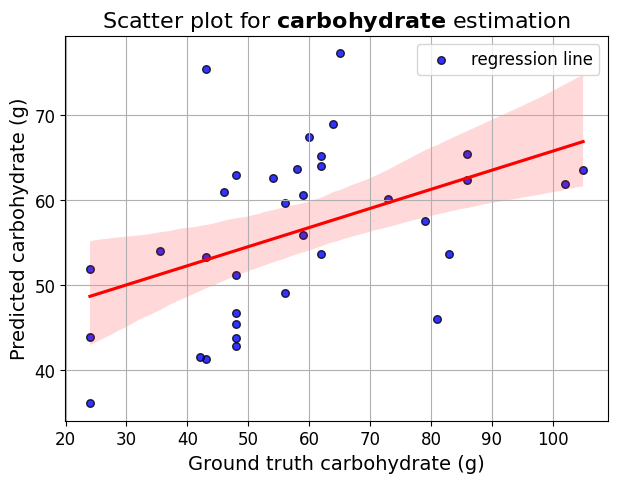

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.regplot(x=y_test, y=y_pred, 
            scatter_kws={'color': 'blue', 's': 30, 'edgecolors': 'black'}, 
            line_kws={'color': 'red'}, label = 'regression line',
            ci=95)

plt.xlabel("Ground truth carbohydrate (g)", fontsize=14, color="black")
plt.ylabel("Predicted carbohydrate (g)", fontsize=14, color="black")
plt.title(r"Scatter plot for $\bf{carbohydrate}$ estimation", fontsize=16, color="black")

plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")
plt.legend(fontsize=12)

plt.grid(True)
plt.show()


In [14]:
W = pca.components_.T  # Transpose to match dimensions (5x3)

beta = lr.coef_

gamma = W @ beta[1:]  # (5x3) @ (3x1) → (5x1)

In [15]:
gamma.shape

(112,)

In [16]:
W.shape

(112, 7)

In [17]:
gamma_summed = gamma.reshape(16, 7).sum(axis=0)
gamma_summed 

array([-0.27629496,  0.84904941,  2.77975712,  1.1975576 ,  2.21487329,
        2.83235989,  1.62668164])

C:\Users\Tech Land\AppData\Local\Temp\ipykernel_19104\736761799.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=signal_labels, y=gamma_summed, palette="coolwarm", edgecolor='black')


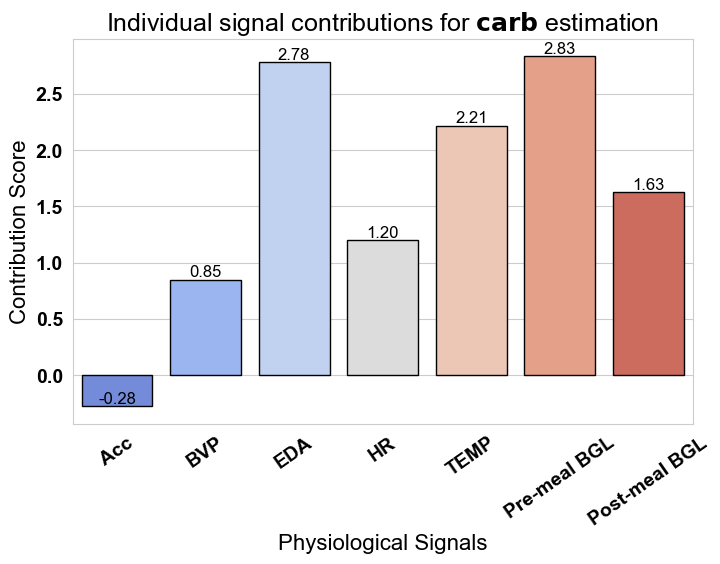

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

signal_labels = ['Acc', 'BVP', 'EDA', 'HR', 'TEMP', 'Pre-meal BGL', 'Post-meal BGL']

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(x=signal_labels, y=gamma_summed, palette="coolwarm", edgecolor='black')

plt.xlabel("Physiological Signals", fontsize=16, color="black")
plt.ylabel("Contribution Score", fontsize=16, color="black")
plt.title(r"Individual signal contributions for $\bf{carb}$ estimation", fontsize=18, color="black")

plt.xticks(rotation=35, fontsize=14, color="black", fontweight="bold")
plt.yticks(fontsize=14, color="black", fontweight="bold")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black')

plt.show()
